In [8]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import norm,lognorm
from scipy.stats.distributions import gamma
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import  LassoLarsIC
from sklearn import linear_model
import statsmodels.api as sm



In [9]:
data=pd.read_csv('weatherHistory.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [11]:
#Data transformation
data['Date'] = pd.to_datetime(data['Formatted Date']. apply(lambda x: x[:19]))
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Week'] = data['Date'].dt.week
data['Hour'] = data['Date'].dt.hour


data['Precip Type'].fillna(method = "pad", inplace = True)
data['Precip Type']=data['Precip Type'].astype('category')
data['Precip Type_int']=data['Precip Type'].cat.codes


data[['Summary']].value_counts()
popular_values = data['Summary'].value_counts().nlargest(8).index
data['Summary']=data['Summary'].apply(lambda x: x if x in popular_values else 'other')
data['Summary']=data['Summary'].astype('category')
data['Summary_int']=data['Summary'].cat.codes


# 1288 rows where Pressure equals 0 
m = data ['Pressure (millibars)'].median()
data.loc[data ['Pressure (millibars)'] ==0,  'Pressure (millibars)'] = m

<ipython-input-11-d66aa17c82a0>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [5]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Year,Month,Day,Week,Hour,Precip Type_int,Summary_int
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00,2006,4,1,13,0,0,7
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00,2006,4,1,13,1,0,7
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00,2006,4,1,13,2,0,5
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00,2006,4,1,13,3,0,7
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00,2006,4,1,13,4,0,5


In [12]:
df = data[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)','Precip Type_int','Precip Type', 'Summary','Summary_int','Year','Month','Week']]

# You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV)

In [7]:
data_plot=[(df['Humidity'],'Humidity'),(df['Visibility (km)'],'Visibility (km)'), (df['Wind Bearing (degrees)'],'Wind Bearing (degrees)'), (df['Apparent Temperature (C)'],'Apparent Temperature (C)')]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


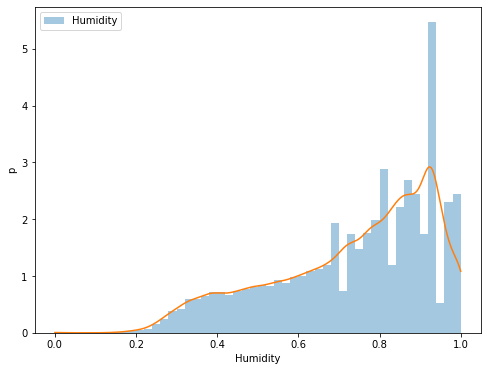

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


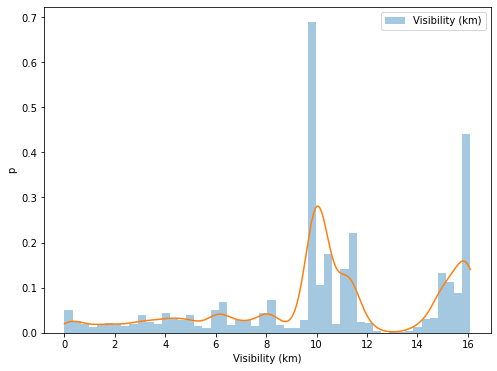

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


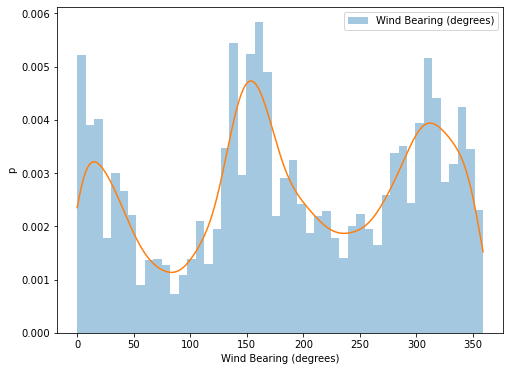

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


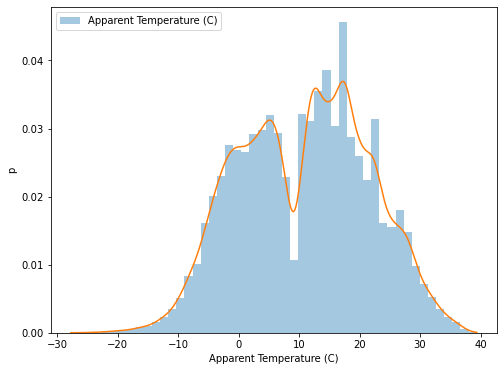

In [62]:
for i,j in data_plot:

    plt.figure(figsize=(8, 6))

    kernel = scipy.stats.gaussian_kde(i)

    min_amount, max_amount = i.min(), i.max()
    x = np.linspace(min_amount, max_amount, len(i))
    kde_values = kernel(x)

    sns.distplot(i, kde=False, norm_hist=True, label=j)
    plt.plot(x, kde_values)

    plt.ylabel('p')
    plt.xlabel(j)
    # Display values along the abscissa axis only in the interval [0, 10000]

    plt.legend()
    plt.show()

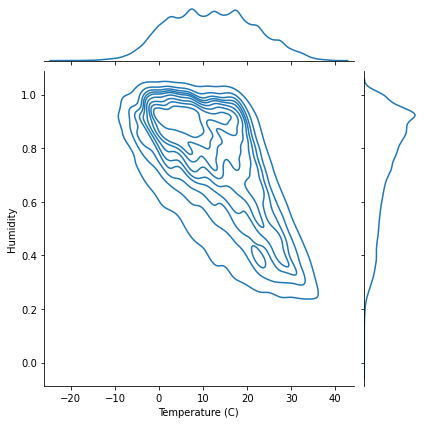

In [110]:
sns.jointplot(data=df, x='Temperature (C)', y='Humidity',kind="kde")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


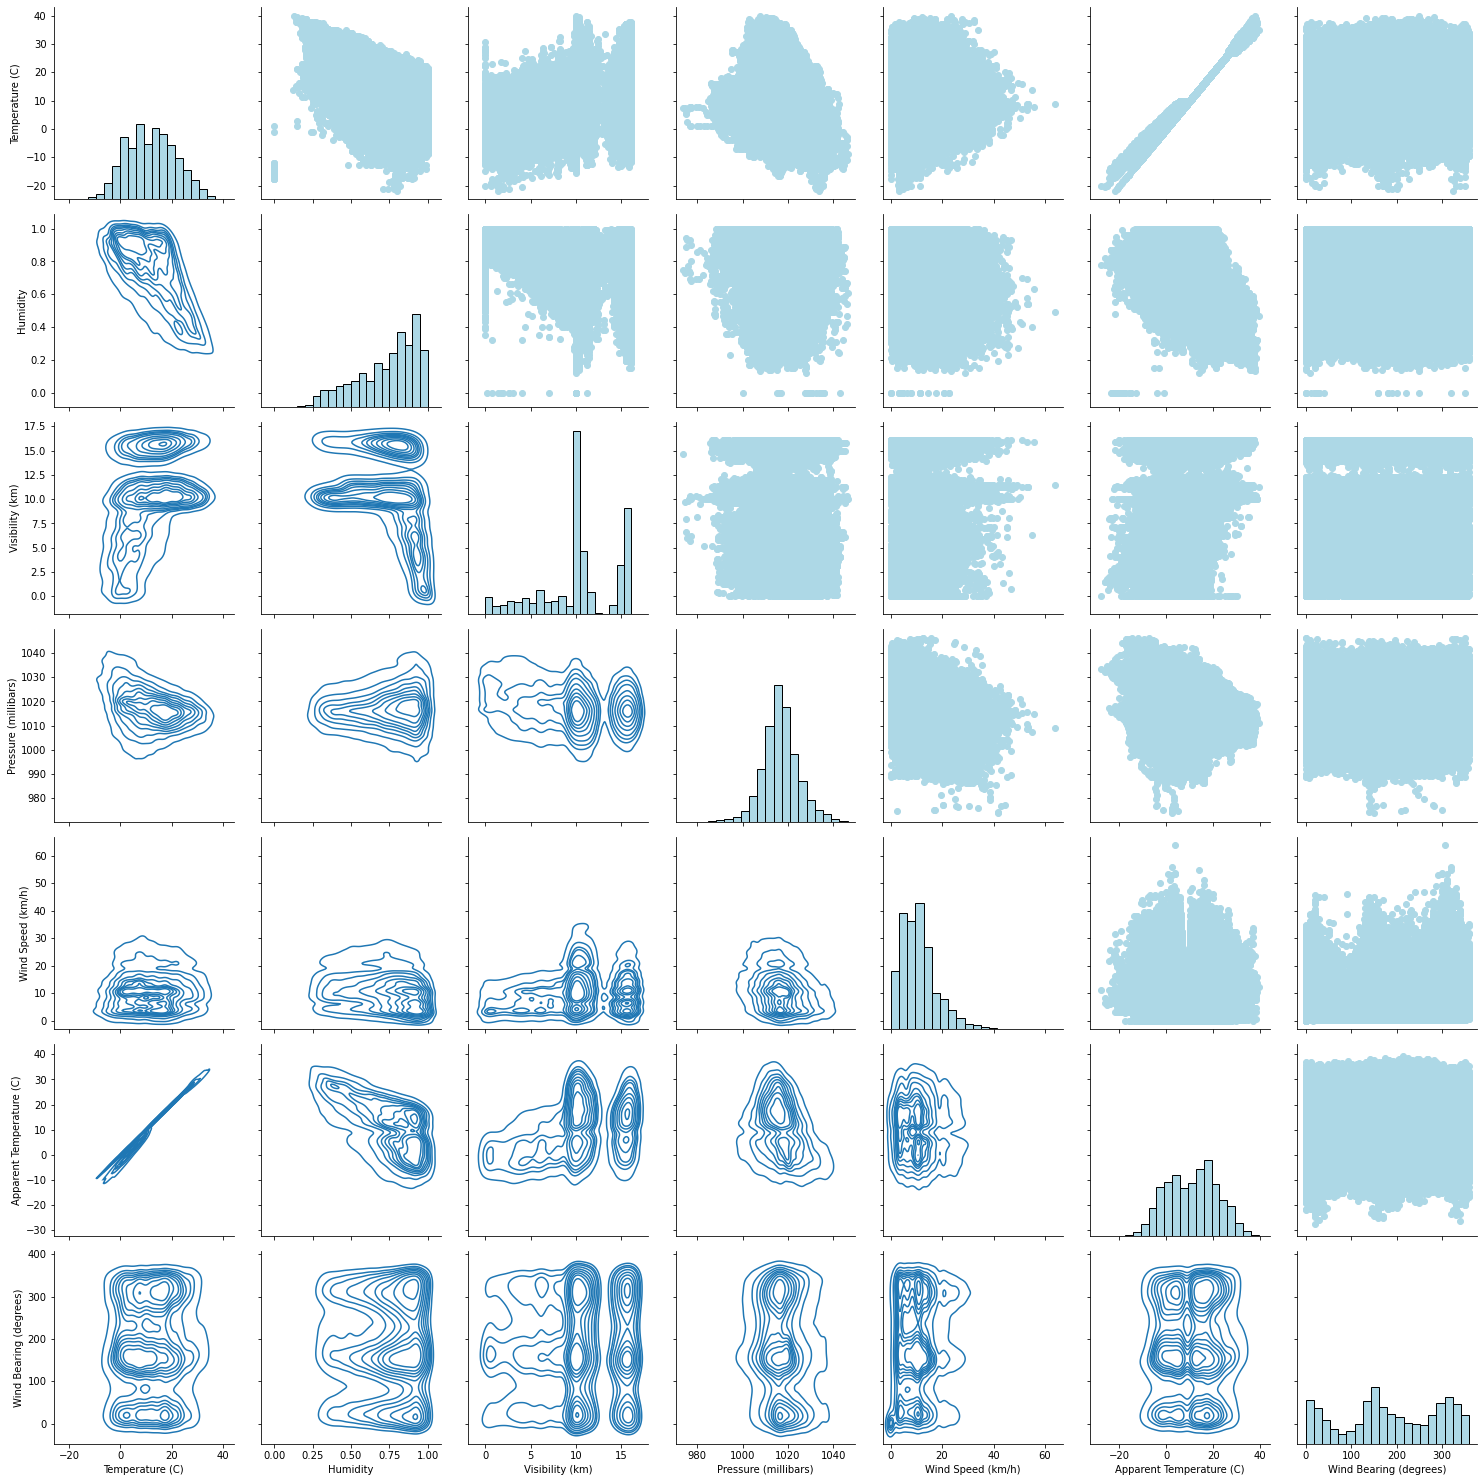

In [7]:
# Create a pair grid instance
grid = sns.PairGrid(data= df,
                    vars = ['Temperature (C)', 'Humidity', 'Visibility (km)','Pressure (millibars)','Wind Speed (km/h)','Apparent Temperature (C)','Wind Bearing (degrees)'], size = 3)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'lightblue')
grid = grid.map_lower(sns.kdeplot )
grid = grid.map_diag(plt.hist, bins = 20,edgecolor =  'k', color = 'lightblue')

In [117]:
grid

# You need to make an estimation of multivariate mathematical expectation and variance.

In [73]:
print(df[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)']].mean())
print(df[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)']].var(ddof=1))

Temperature (C)               11.932678
Humidity                       0.734899
Wind Speed (km/h)             10.810640
Visibility (km)               10.347325
Pressure (millibars)        1016.809278
Wind Bearing (degrees)       187.509232
Apparent Temperature (C)      10.855029
dtype: float64
Temperature (C)                91.232037
Humidity                        0.038210
Wind Speed (km/h)              47.797464
Visibility (km)                17.573897
Pressure (millibars)           59.696622
Wind Bearing (degrees)      11531.200691
Apparent Temperature (C)      114.422544
dtype: float64


# You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

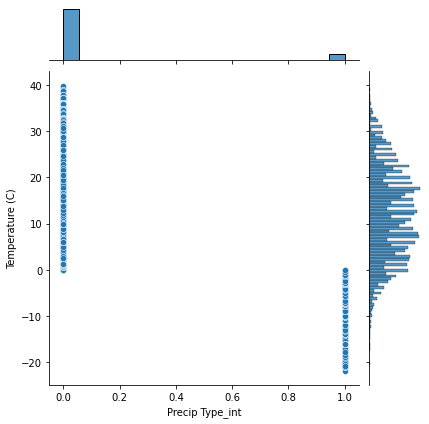

In [18]:
sns.jointplot(data=df, x='Precip Type_int',y='Temperature (C)')

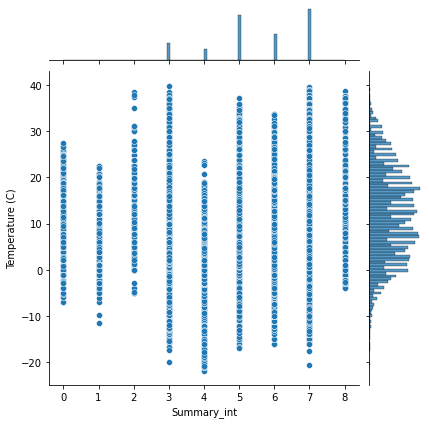

In [19]:
sns.jointplot(data=df, x='Summary_int',y='Temperature (C)')

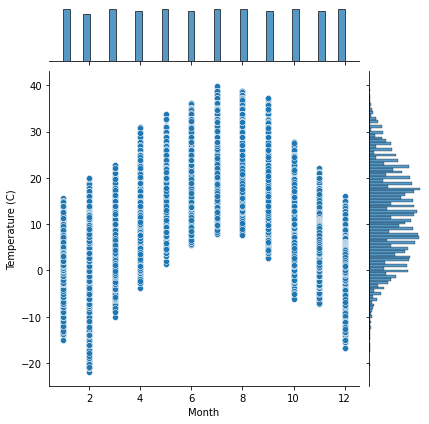

In [20]:
sns.jointplot(data=df, x='Month',y='Temperature (C)')

In [136]:
 dexp = pd.DataFrame(columns =['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)'])
for i in set(df['Summary']):
    dexp.loc[i]=df[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)']].loc[df['Summary']==i].apply(np.mean)
dexp

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Wind Bearing (degrees),Apparent Temperature (C)
Breezy and Partly Cloudy,12.492761,0.545803,33.532796,11.326058,1014.831244,259.282383,9.989349
Clear,11.925109,0.729708,8.141352,11.441788,1019.713541,179.180257,11.040338
Overcast,7.516502,0.837232,12.027738,9.275112,1015.125067,183.532747,5.789636
Mostly Cloudy,12.629334,0.725069,11.418404,11.117234,1015.688755,192.049299,11.624994
Foggy,1.464035,0.950765,7.171649,1.551411,1021.410867,168.668439,-0.210419
Partly Cloudy,16.024782,0.648571,10.115130,11.811517,1016.986884,190.161094,15.394033
Breezy and Mostly Cloudy,11.093411,0.637054,33.386345,11.478302,1010.472306,227.639535,8.680588
other,14.561458,0.626649,24.572446,9.127380,1013.279697,218.748663,12.324262
Breezy and Overcast,7.241614,0.763144,33.037566,11.067012,1007.890208,213.526515,3.492235


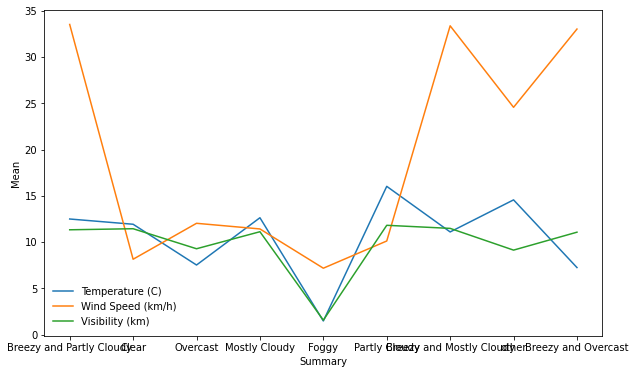

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(dexp[['Temperature (C)','Wind Speed (km/h)','Visibility (km)']])
plt.xlabel('Summary')
plt.ylabel('Mean')
plt.legend(['Temperature (C)','Wind Speed (km/h)','Visibility (km)'],loc='best', frameon=False)

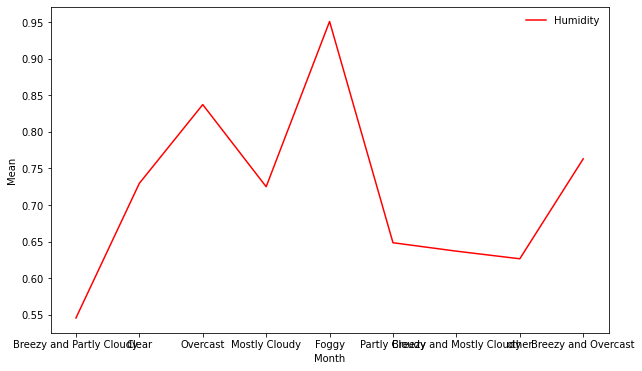

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(dexp[['Humidity']], color = 'r')
plt.xlabel('Month')
plt.ylabel('Mean')
plt.legend(['Humidity'],loc='best', frameon=False)

In [146]:
 dexp = pd.DataFrame(columns =['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)'])
for i in set(df['Precip Type']):
    dexp.loc[i]=df[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)']].loc[df['Precip Type']==i].mean()
dexp

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Wind Bearing (degrees),Apparent Temperature (C)
snow,-3.270885,0.863263,9.481998,6.636570,1023.413994,174.754294,-6.249847
rain,13.832126,0.718862,10.976633,10.810926,1015.992833,189.102763,12.992016


In [143]:
 dexp = pd.DataFrame(columns =['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)'])
for i in set(df['Month']):
    dexp.loc[i]=df[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)']].loc[df['Month']==i].mean()
dexp

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Wind Bearing (degrees),Apparent Temperature (C)
1,0.813890,0.850723,11.512816,7.830584,1019.539355,180.405425,-1.939615
2,2.159699,0.813400,12.185543,8.731368,1017.274985,188.717176,-0.565343
3,6.906599,0.702966,13.405461,10.910450,1015.978086,186.538480,5.074268
4,12.756417,0.641133,11.893094,11.784224,1014.616559,186.653157,12.141164
5,16.873692,0.691325,10.959337,11.892754,1014.056500,188.071237,16.732751
6,20.715617,0.686470,9.626471,11.990266,1014.332688,202.780808,20.742264
7,22.963943,0.639657,9.639907,12.187820,1014.405955,202.812248,22.976086
8,22.345031,0.635542,8.933431,12.455549,1014.967450,195.329800,22.270497
9,17.516790,0.688790,9.621813,11.602874,1016.992822,187.667424,17.404283
10,11.342247,0.774554,10.000153,9.741691,1019.491774,176.912630,10.694346


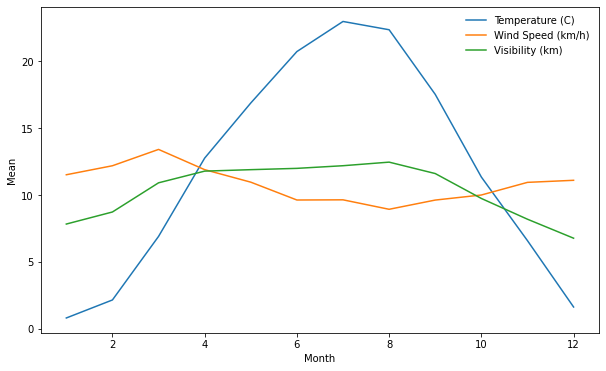

In [144]:
plt.figure(figsize=(10, 6))
plt.plot(dexp[['Temperature (C)','Wind Speed (km/h)','Visibility (km)']])
plt.xlabel('Month')
plt.ylabel('Mean')
plt.legend(['Temperature (C)','Wind Speed (km/h)','Visibility (km)'],loc='best', frameon=False)


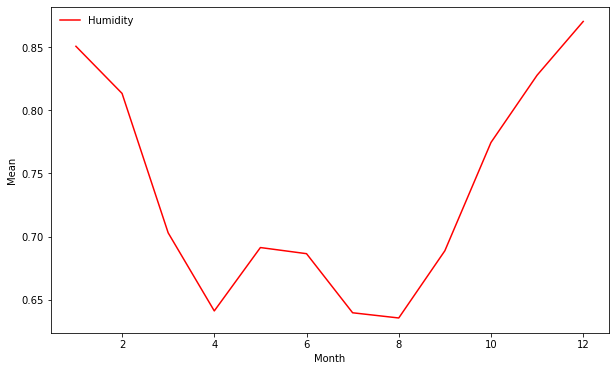

In [145]:
plt.figure(figsize=(10, 6))
plt.plot(dexp[['Humidity']], color  = 'r')
plt.xlabel('Month')
plt.ylabel('Mean')
plt.legend(['Humidity'],loc='best', frameon=False)

In [149]:
 dvar = pd.DataFrame(columns =['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)'])
for i in set(df['Summary']):
    dvar.loc[i]=df[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)']].loc[df['Summary']==i].var(ddof=1)
dvar

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Wind Bearing (degrees),Apparent Temperature (C)
Overcast,50.584138,0.015231,42.843391,13.811699,82.851814,12841.336554,71.888686
Partly Cloudy,89.249982,0.041316,35.753699,9.474884,40.444207,11756.947009,107.236896
Breezy and Overcast,31.276682,0.019424,8.345418,11.002417,85.791324,11955.775387,65.266300
other,88.168737,0.055569,160.256152,12.497478,58.555060,10765.582237,132.301496
Breezy and Mostly Cloudy,44.671034,0.023751,8.518435,5.383014,81.202396,8831.186317,82.557405
Clear,100.379545,0.035913,28.564734,16.796249,45.890422,11438.578121,121.355502
Mostly Cloudy,71.479672,0.030723,38.731771,10.082809,50.775272,10491.841766,92.809804
Foggy,33.141441,0.003046,23.996018,1.084168,96.895823,10910.872842,42.864839


In [150]:
 dvar = pd.DataFrame(columns =['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)'])
for i in set(df['Precip Type']):
    dvar.loc[i]=df[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)']].loc[df['Precip Type']==i].var(ddof=1)
dvar

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Wind Bearing (degrees),Apparent Temperature (C)
snow,9.457543,0.012323,42.667604,21.480876,88.162607,11916.154916,14.570974
rain,68.962055,0.039128,48.190763,15.150768,50.966624,11460.380097,85.777658


In [152]:
 dvar = pd.DataFrame(columns =['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)'])
for i in set(df['Month']):
    dvar.loc[i]=df[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Apparent Temperature (C)']].loc[df['Month']==i].var(ddof=1)
dvar

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Wind Bearing (degrees),Apparent Temperature (C)
1,23.838026,0.012583,55.704899,21.045394,102.214223,10008.434168,29.729638
2,31.575321,0.019051,51.030376,18.902179,88.677059,10225.565317,42.916492
3,29.876253,0.034559,69.089474,13.240301,93.886582,12077.219181,44.117637
4,30.382930,0.040653,53.485041,10.838538,40.536318,11699.990178,38.963615
5,28.499911,0.036961,44.298343,8.827943,29.744164,12338.958997,30.475697
6,31.506075,0.041060,32.456351,9.096280,20.093503,12413.257669,32.526559
7,32.937982,0.046583,36.001774,8.745070,18.629539,12740.910222,33.130357
8,34.809759,0.047863,31.812173,8.953354,17.246860,13894.522753,33.533075
9,33.206162,0.041719,39.875214,12.312670,27.310088,13466.577092,33.317679
10,29.505623,0.027793,43.699227,17.678173,40.799511,11389.568885,37.242724


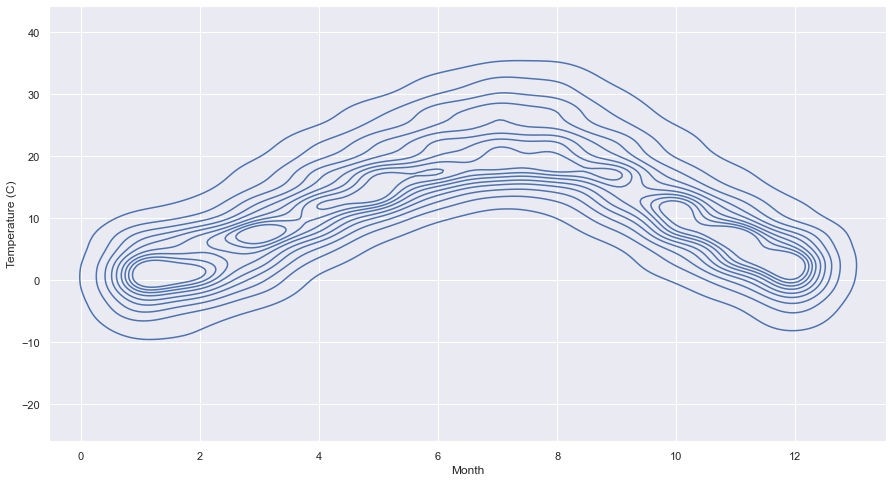

In [425]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=df, x='Month', y='Temperature (C)')

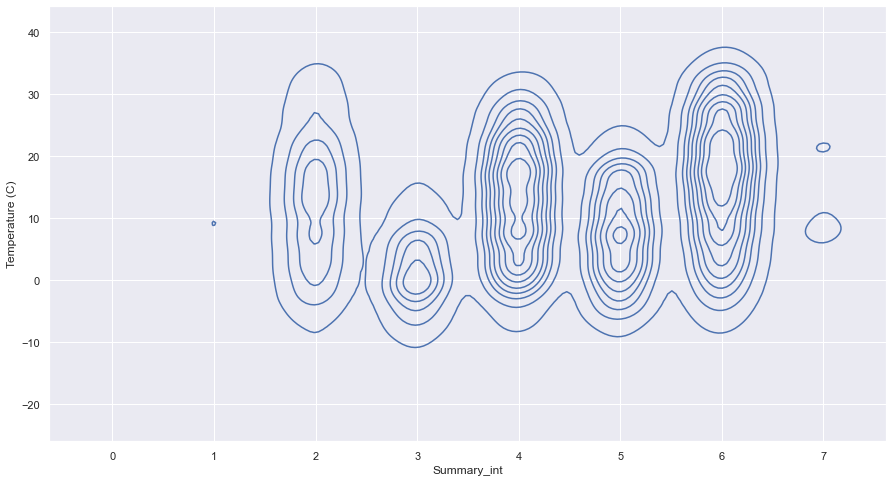

In [424]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=df, x='Summary_int', y='Temperature (C)')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


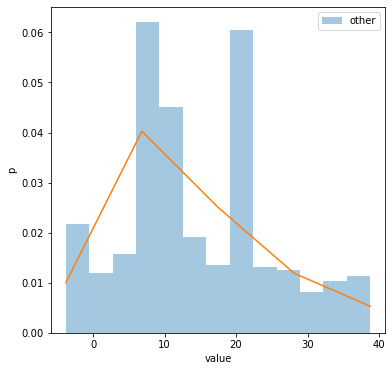

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


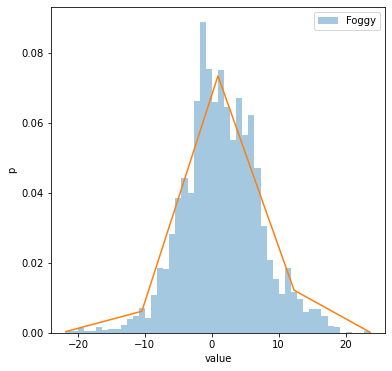

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


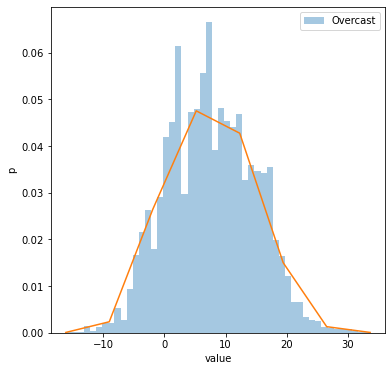

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


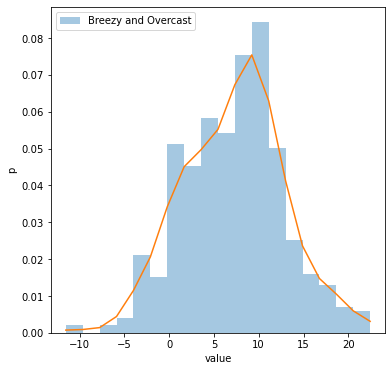

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


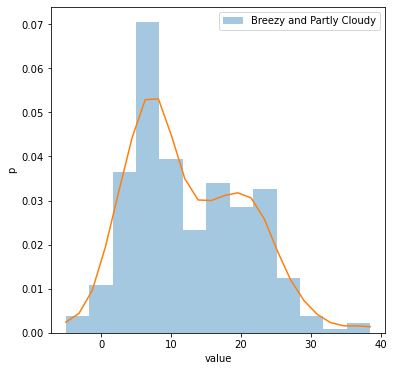

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


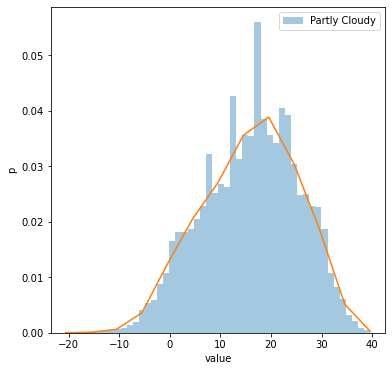

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


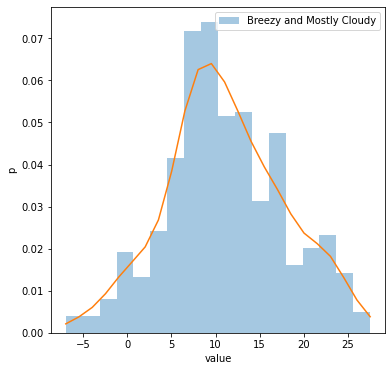

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


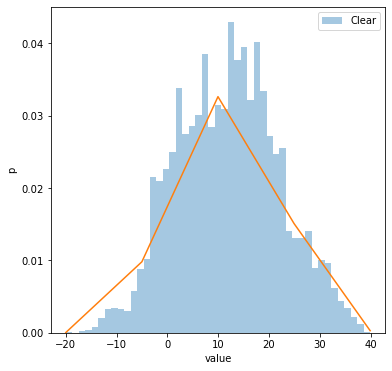

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


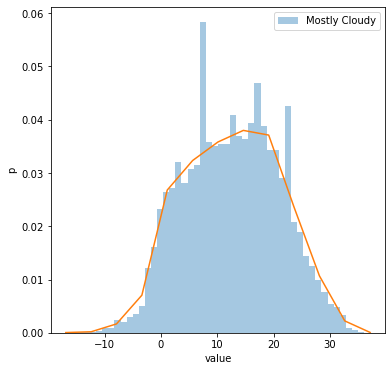

In [89]:


for i in set(df["Summary"]) :
    plt.figure(figsize=(6, 6))
    d = df['Temperature (C)'].loc[df["Summary"]==i].reset_index(drop=True)
    kernel = scipy.stats.gaussian_kde(d)

    min_amount, max_amount = d.min(), d.max()
    x = np.linspace(min_amount, max_amount, len(i))
    kde_values = kernel(x)

    sns.distplot(d, kde=False, norm_hist=True, label=i)
    plt.plot(x, kde_values)

    plt.ylabel('p')
    plt.xlabel('value')

    plt.legend()
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


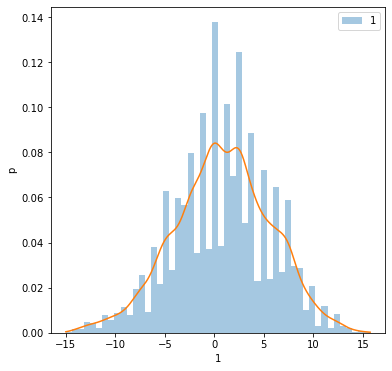

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


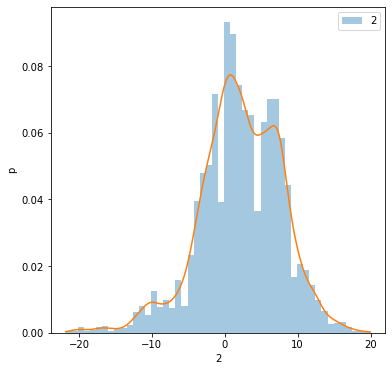

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


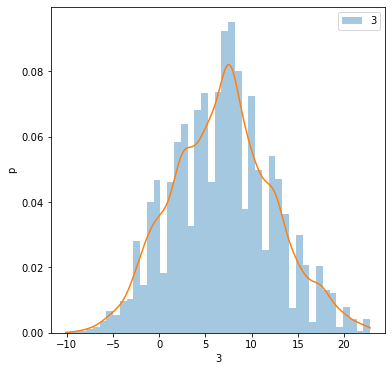

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


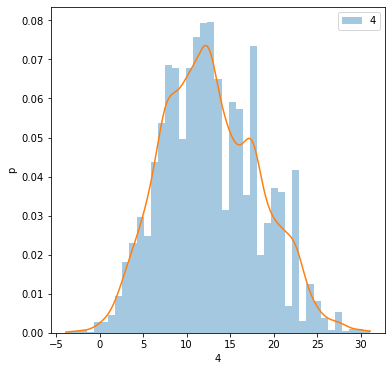

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


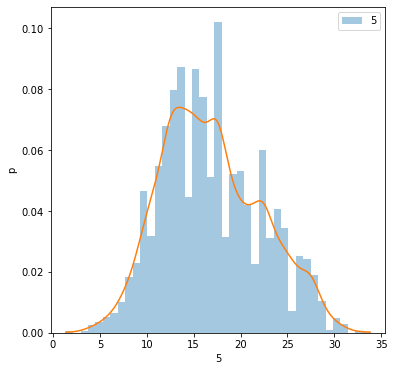

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


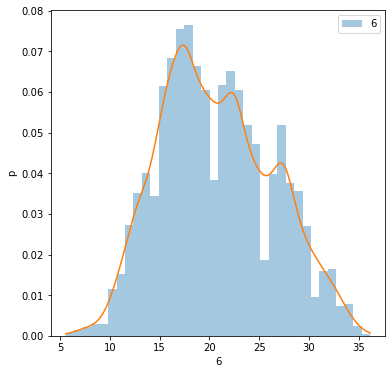

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


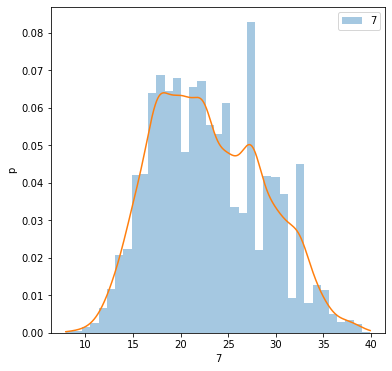

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


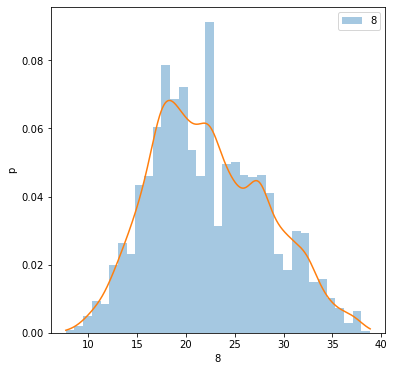

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


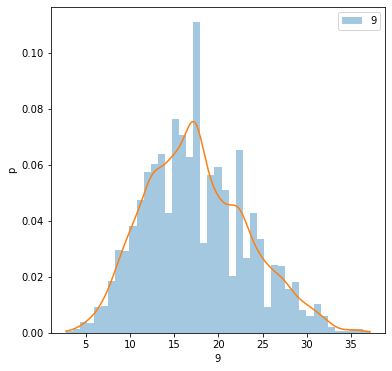

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


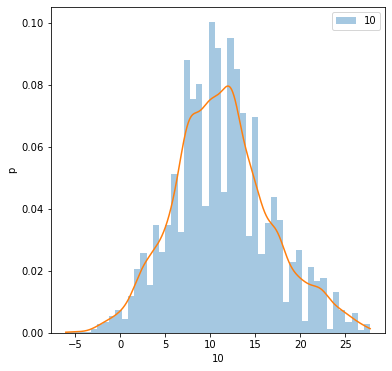

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


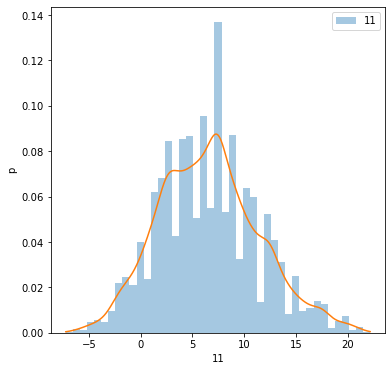

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


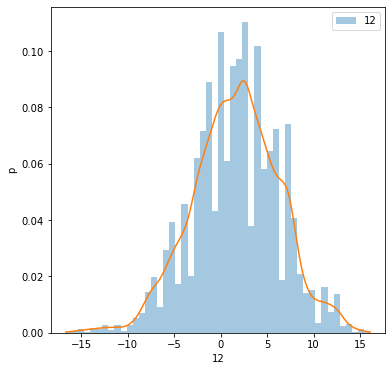

In [77]:
for i in set(df['Month']):
    
    plt.figure(figsize=(6, 6))
    d = df['Temperature (C)'].loc[df['Month']==i].reset_index(drop=True)
    kernel = scipy.stats.gaussian_kde(d)

    min_amount, max_amount = d.min(), d.max()
    x = np.linspace(min_amount, max_amount, len(d))
    kde_values = kernel(x)

    sns.distplot(d, kde=False, norm_hist=True, label=i)
    plt.plot(x, kde_values)

    plt.ylabel('p')
    plt.xlabel(i)
    # Display values along the abscissa axis only in the interval [0, 10000]

    plt.legend()
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


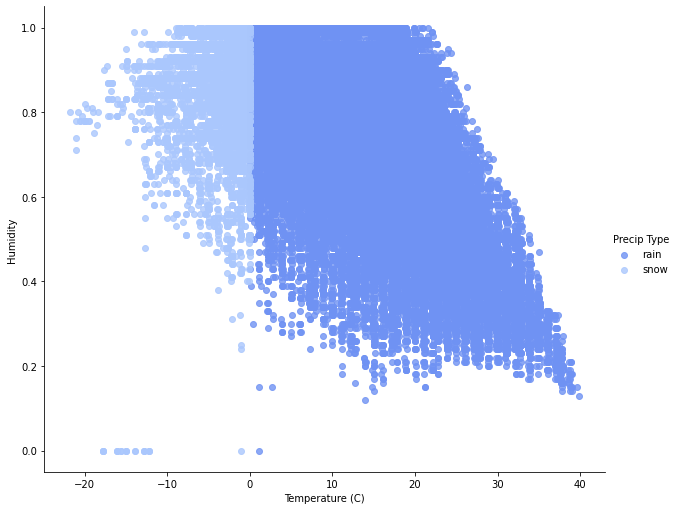

In [67]:
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
sns.lmplot("Temperature (C)", "Humidity", df, hue="Precip Type", palette=sns.color_palette('coolwarm', n_colors=5),fit_reg=False, height=7, aspect=1.2)

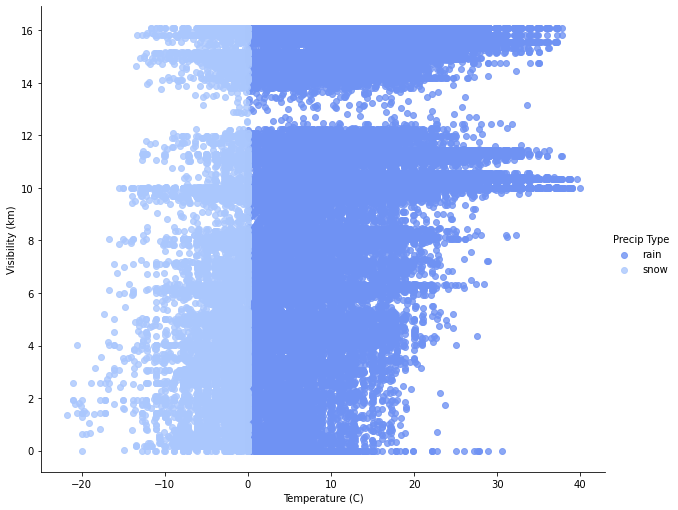

In [68]:
sns.lmplot("Temperature (C)", "Visibility (km)", df, hue="Precip Type", palette=sns.color_palette('coolwarm', n_colors=5),fit_reg=False, height=7, aspect=1.2)

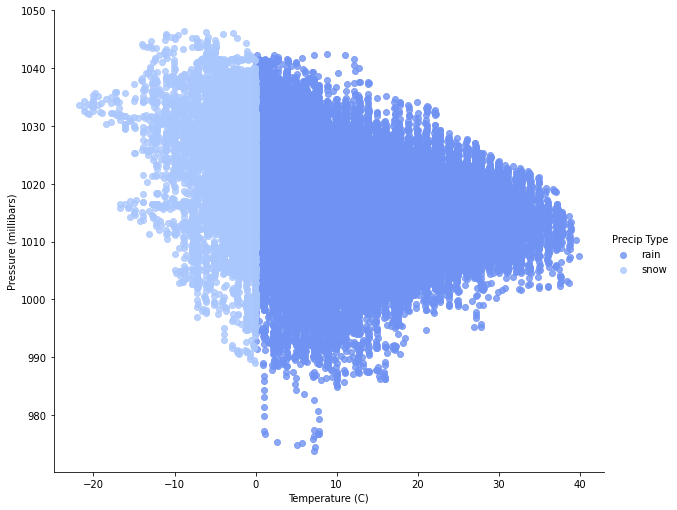

In [69]:
sns.lmplot("Temperature (C)", 'Pressure (millibars)', df, hue="Precip Type", palette=sns.color_palette('coolwarm', n_colors=5),fit_reg=False, height=7, aspect=1.2)

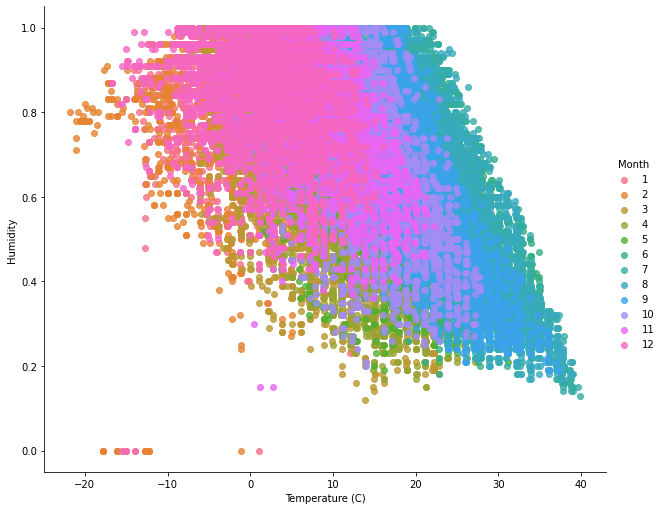

In [70]:
sns.lmplot("Temperature (C)", "Humidity", df, hue="Month", fit_reg=False, height=7, aspect=1.2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


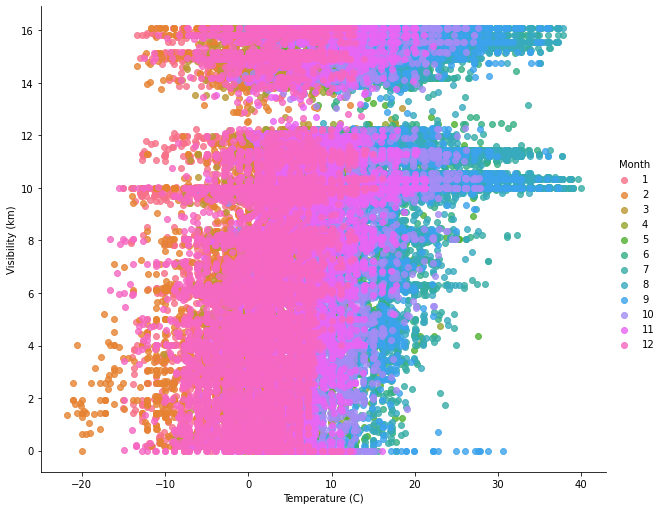

In [71]:
sns.lmplot("Temperature (C)", "Visibility (km)", df, hue="Month", fit_reg=False, height=7, aspect=1.2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


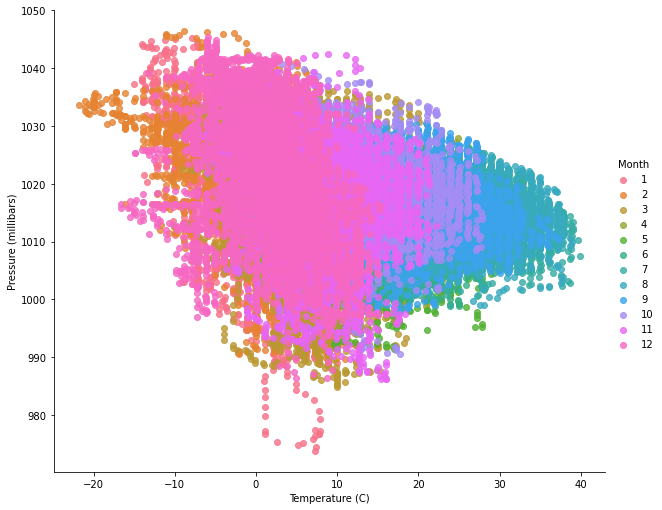

In [72]:
sns.lmplot("Temperature (C)", "Pressure (millibars)", df, hue="Month", fit_reg=False, height=7, aspect=1.2)

#  You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [91]:
result = pd.DataFrame(columns = ['Value1', 'Values2', 'P-value', 'Corellation','interval from', 'interval to'])

In [92]:

l=np.array(df['Temperature (C)'])
data1 = [df['Temperature (C)'],df['Humidity'],df['Wind Speed (km/h)'],df['Visibility (km)'],df['Pressure (millibars)'],df['Wind Bearing (degrees)'],
         df['Apparent Temperature (C)'],df['Precip Type_int'], df['Summary_int'],df['Year'],df['Month'],df['Week']]
k=0
se = 1/np.sqrt(l.size-3)
alpha = 0.05
z = scipy.stats.norm.ppf(1-alpha/2)
for i in data1:
    k+=1
    for j in data1[k:]:
        r, p = scipy.stats.pearsonr(i,j)
        print(i.name,j.name)
        print("p-value:\t", p)
        print("cor:\t\t", r)
        r_z = np.arctanh(r)
        lo_z, hi_z = r_z-z*se, r_z+z*se
        lo_z, hi_z
        lo, hi = np.tanh((lo_z, hi_z))
        print("interval:\t", lo, hi)
        print()
        d=pd.DataFrame([[i.name,j.name,p,r,lo,hi]], columns = ['Value1', 'Values2', 'P-value', 'Corellation','interval from', 'interval to'])
        result=result.append(d,ignore_index=True)

Temperature (C) Humidity
p-value:	 0.0
cor:		 -0.6322546750278025
interval:	 -0.6360277624035049 -0.6284513570734944

Temperature (C) Wind Speed (km/h)
p-value:	 0.00540625149582242
cor:		 0.008956968343701391
interval:	 0.0026462192222577027 0.015267004056099973

Temperature (C) Visibility (km)
p-value:	 0.0
cor:		 0.3928465717241786
interval:	 0.38749635977776836 0.3981703206275946

Temperature (C) Pressure (millibars)
p-value:	 0.0
cor:		 -0.3081197611445596
interval:	 -0.313820432062976 -0.30239687697933515

Temperature (C) Wind Bearing (degrees)
p-value:	 1.2152154402540676e-20
cor:		 0.02998820447357345
interval:	 0.023681787608566252 0.03629223477966614

Temperature (C) Apparent Temperature (C)
p-value:	 0.0
cor:		 0.9926285641921317
interval:	 0.992535281989797 0.992720684960119

Temperature (C) Precip Type_int
p-value:	 0.0
cor:		 -0.562619727890466
interval:	 -0.5669177081070857 -0.5582911177907541

Temperature (C) Summary_int
p-value:	 0.0
cor:		 0.2083531749332301
interval:

In [93]:
result.to_csv('result.csv')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


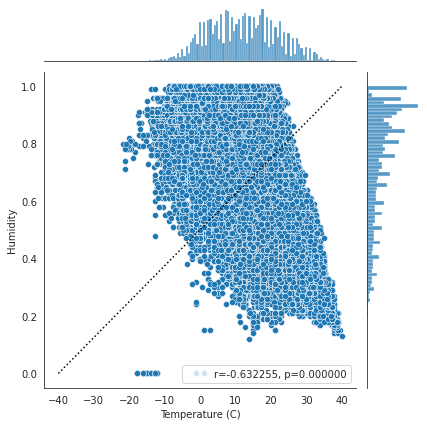

In [60]:
with sns.axes_style('white'):
    g = sns.jointplot("Temperature (C)", "Humidity", df, kind='scatter',palette=sns.color_palette('coolwarm', n_colors=5))
    r, p = scipy.stats.pearsonr(df['Temperature (C)'], df["Humidity"])
    c=g.ax_joint.plot(np.linspace(-40, 40),
                    np.linspace(0, 1), ':k')
    phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
    g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

#  Choose a task formulation for regression. Estimate multivariate correlation (target -predictors).

<ipython-input-161-2ee8fd7a0377>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool) # make mask


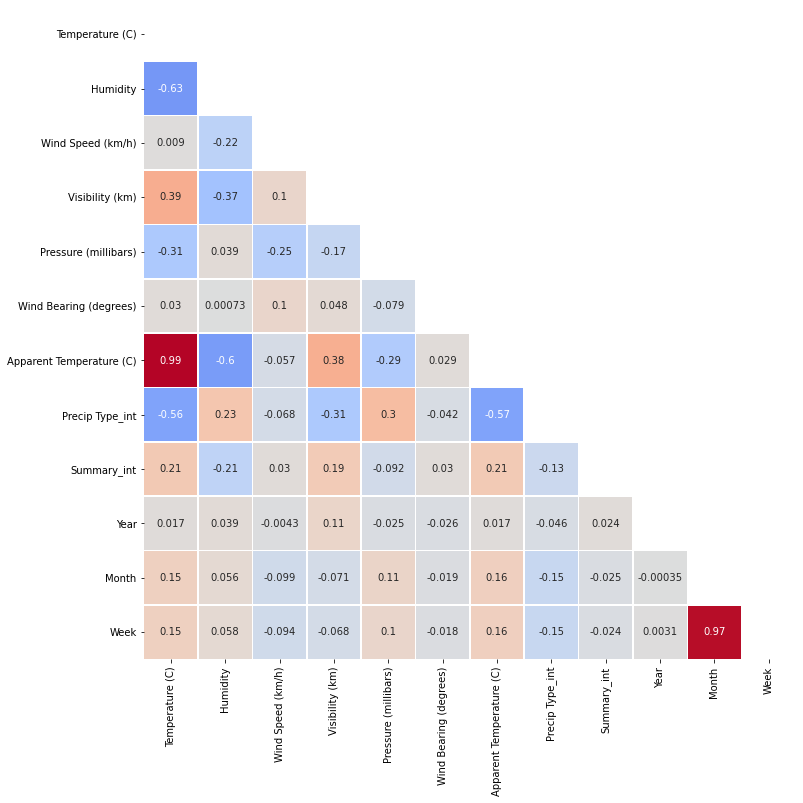

In [161]:
def corrPairs(df):
    '''Pairwise correlation matrix'''
    corr = df.corr() # Compute the correlation matrix
    mask = np.zeros_like(corr, dtype=np.bool) # make mask
    mask[np.triu_indices_from(mask)] = True # mask upper triangle
    sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=.5, annot=True, cbar=False)
 # add week to view correlation
plt.figure(figsize=(12,12))
corrPairs(df)

#  Build regression model and make an analysis of multicollinearity and regularization (if needed).

## Regression

In [13]:
# Highlight predictors
X = df[['Humidity','Visibility (km)','Pressure (millibars)','Apparent Temperature (C)','Precip Type_int','Summary_int','Month']]
# Allocate the target variable
y = df[['Temperature (C)']]
# Division into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1000)


In [14]:
x = []
for i in range(len(y_test)):
    x.append(i)
# Create a linear regression model
reg = LinearRegression(normalize=True)
# Train a linear regression model
reg.fit(X_train, y_train)
# Forecast on a test sample
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)

## Regression with Lasso

In [15]:
# Lasso regularization
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print(clf.coef_)

[-0.          0.02730091 -0.03041947  0.87530583  0.          0.
 -0.        ]


In [16]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)
alpha_aic_ = model_aic.coef_
alpha_aic_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([-2.95278955,  0.00643819, -0.04174593,  0.84000762, -0.10040092,
        0.        ,  0.01433934])

In [17]:
y_pred_lasso = clf.predict(X_test)
y_pred_lasso_aic = model_aic.predict(X_test)

In [18]:
y_pred_lasso=y_pred_lasso.reshape(len(y_pred_lasso),1)
y_pred_lasso_aic=y_pred_lasso_aic.reshape(len(y_pred_lasso),1)

# Analyze the quality of regression model (distribution of residuals, determination coefficient).

## Accuracy

In [14]:
  #we cannot use this metric because  y_true has zero vakues
def mean_absolute_percentage_error(y_test, y_pred): 
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
def wape(y_test, y_pred):
        return (np.sum(np.abs((y_test - y_pred))) /np.sum( y_test)) * 100
   
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def model_accuracy(y_test, y_pred,result):
    print('model weights:', result.coef_)
    print ('constant:',result.intercept_)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print('Mean absolute error = ', mae)
    print('Mean squared error = ', mse)

    #we cannot use this metric because  y_true has zero vakues
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    print('Mean absolute percentage error = ', mape)
    wape = (np.sum(np.abs((y_test - y_pred))) /np.sum( y_test)) * 100
    print('Weight absolute percentage error = ', wape)
    
    #RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('Root Mean Square Error  = ', rmse)

    print('R^2 =' ,r2_score(y_test,y_pred))

In [15]:
model_accuracy(y_test, y_pred_lasso, clf)

model weights: [-0.          0.02730091 -0.03041947  0.87530583  0.          0.
 -0.        ]
constant: [33.07493865]
Mean absolute error =  0.8681881286098379
Mean squared error =  1.2512989819011295
Mean absolute percentage error =  Temperature (C)    inf
dtype: float64
Weight absolute percentage error =  Temperature (C)    7.275017
dtype: float64
Root Mean Square Error  =  1.1186147602732273
R^2 = 0.9863160725957529


In [16]:
model_accuracy(y_test, y_pred_lasso_aic,model_aic)

model weights: [-2.95278955  0.00643819 -0.04174593  0.84000762 -0.10040092  0.
  0.01433934]
constant: 47.279239024615805
Mean absolute error =  0.7937719177077586
Mean squared error =  1.0547813760683906
Mean absolute percentage error =  Temperature (C)    inf
dtype: float64
Weight absolute percentage error =  Temperature (C)    6.651443
dtype: float64
Root Mean Square Error  =  1.027025499229883
R^2 = 0.9884651454318756


In [17]:
model_accuracy(y_test, y_pred, reg)

model weights: [[-3.06519031  0.00922801 -0.04461954  0.83858443 -0.12852344  0.01126842
   0.02231111]]
constant: [50.15961827]
Mean absolute error =  0.7951884229794225
Mean squared error =  1.0539065394937406
Mean absolute percentage error =  Temperature (C)    inf
dtype: float64
Weight absolute percentage error =  Temperature (C)    6.663313
dtype: float64
Root Mean Square Error  =  1.0265995029678032
R^2 = 0.9884747124501112


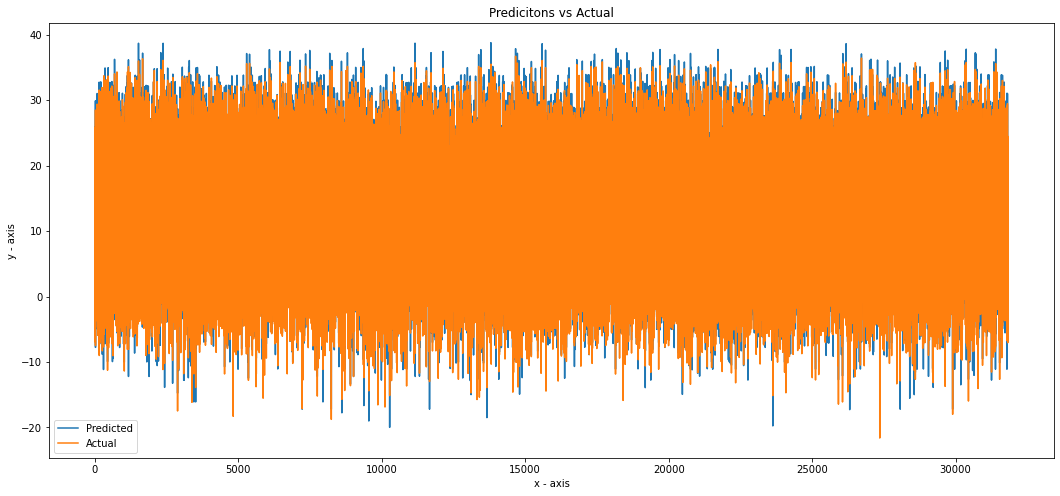

In [37]:
plt.figure(figsize=(18, 8))


plt.plot(y_test.reset_index(drop=True), label = "Predicted")
plt.plot(y_pred, label = "Actual")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Predicitons vs Actual')
plt.legend()

plt.show()

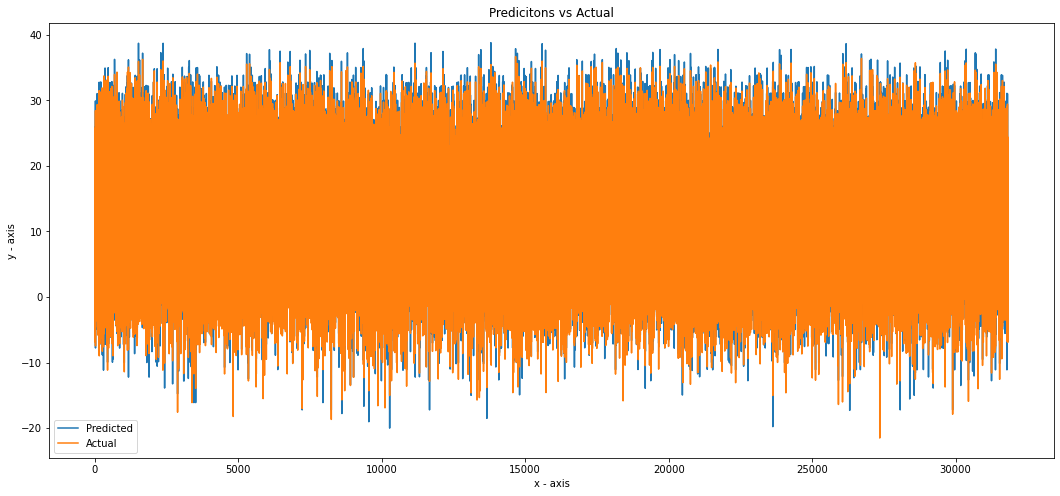

In [38]:
plt.figure(figsize=(18, 8))


plt.plot(y_test.reset_index(drop=True), label = "Predicted")
plt.plot(y_pred_lasso_aic, label = "Actual")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Predicitons vs Actual')
plt.legend()

plt.show()

In [39]:
import itertools
merged = list(itertools.chain(*y_pred_lasso_aic))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


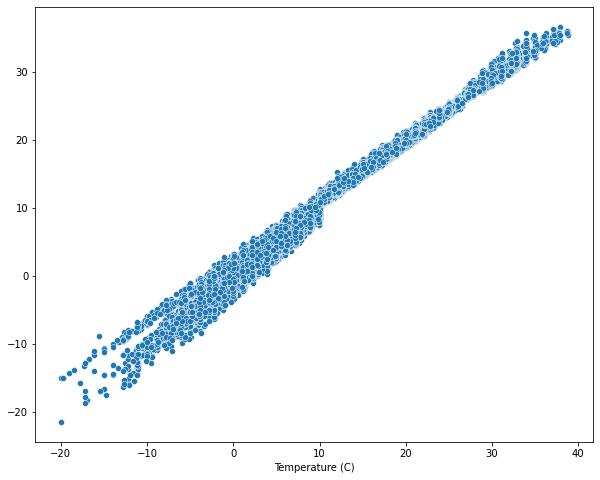

In [40]:
plt.figure(figsize=[10,8])
sns.scatterplot(y_test['Temperature (C)'],merged)

## Residuals

In [49]:
residuals = y_test -  y_pred
residuals_lasso_aic = y_test -  y_pred_lasso_aic
residuals_lasso_aic = residuals_lasso_aic['Temperature (C)']

In [20]:
mean_residuals = np.mean(residuals_lasso_aic)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.011417310608333193


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


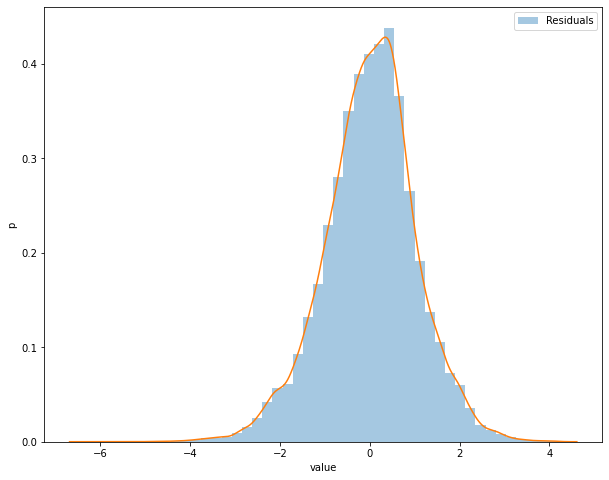

In [50]:
plt.figure(figsize=(10, 8))
d =residuals_lasso_aic
kernel = scipy.stats.gaussian_kde(d)
min_amount, max_amount = d.min(), d.max()
x = np.linspace(min_amount, max_amount, len(d))
kde_values = kernel(x)

sns.distplot(d, kde=False, norm_hist=True, label="Residuals")
plt.plot(x, kde_values)

plt.ylabel('p')
plt.xlabel('value')

plt.legend()
plt.show()

In [104]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals_lasso_aic, X_test)
lzip(name, test)

[('F statistic', 1.0168003808004122), ('p-value', 0.14670599009271068)]

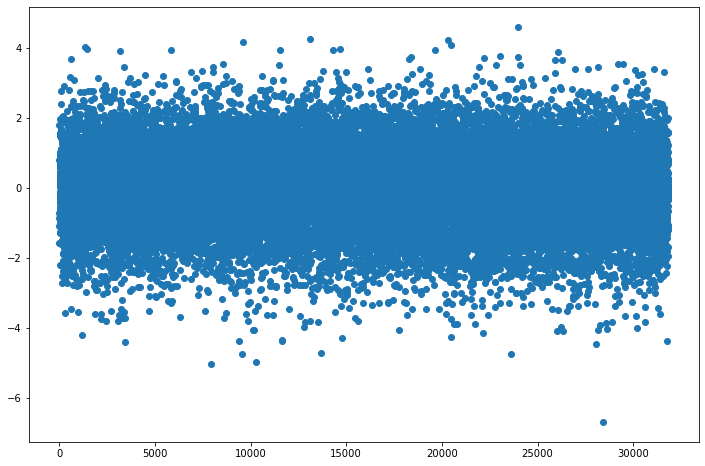

In [51]:
plt.figure(figsize=(12,8))
plt.plot( residuals_lasso_aic.reset_index(drop=True),'o')

In [106]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals_lasso_aic , lags = 10)[1])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


0.1808050305994689

In [47]:
scipy.stats.shapiro(residuals_lasso_aic[:300])

ShapiroResult(statistic=0.9888373017311096, pvalue=0.020995810627937317)

In [34]:
# several changes for pressure
min_val =-4
max_val = 4
residuals_lasso_aic = residuals_lasso_aic[(residuals_lasso_aic>min_val) & (residuals_lasso_aic<max_val)]
print('Shape: ',residuals_lasso_aic.shape)

Shape:  (31801,)


{'whiskers': [<matplotlib.lines.Line2D at 0x2462503ec10>,
 'caps': [<matplotlib.lines.Line2D at 0x2462504b7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2462503e430>],
 'medians': [<matplotlib.lines.Line2D at 0x2462504bf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x246248e4ee0>],
 'means': []}

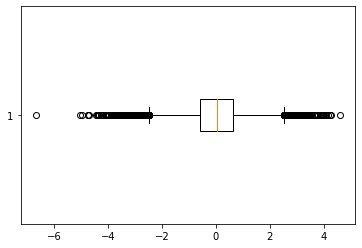

In [52]:
plt.boxplot(residuals_lasso_aic, vert=0)

In [138]:
percs = np.linspace(0, 100, 1000)
data1 = np.percentile(residuals_lasso_aic, percs)
scipy.stats.shapiro(data1)

ShapiroResult(statistic=0.9969438314437866, pvalue=0.05207353085279465)

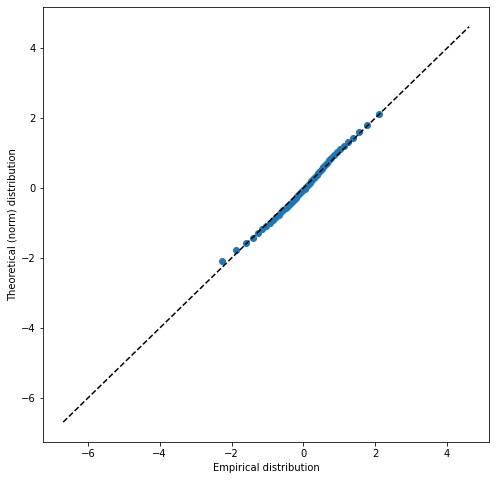

In [53]:
params = scipy.stats.norm.fit(residuals_lasso_aic)
x = np.linspace(np.min(residuals_lasso_aic), np.max(residuals_lasso_aic))

percs = np.linspace(0, 100)
qn_first = np.percentile(residuals_lasso_aic, percs)
qn_gamma = scipy.stats.norm.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(8, 8))
plt.plot(qn_first, qn_gamma, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (norm) distribution')

plt.show()